## Analisando Notas
### Aula 01 - Dados e Visualizações

In [6]:
string = 'Lui'
print(string)

Lui


In [7]:
import pandas as pd
import seaborn as sns
notas = pd.read_csv("dados/ratings.csv") # Lendo o arquivo csv e atribuindo a notas

notas.head()

# Notas aqui é um DataFrame

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas.shape # Mostrando o formato dos dados, linhas e colunas

(100836, 4)

In [9]:
# Mudando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas['nota'] # Checando os valores da Coluna "nota"
# O que é retornado pra mim é um panda "series"

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [11]:
# Utilizando "series" para saber os valores únicos de notas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [12]:
# Contando as ocorrências dos notas em cada valor
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [13]:
# Média e mediana de todas as notas
print("Media: ", notas['nota'].mean())
print("Mediana: ",notas.nota.median())

Media:  3.501556983616962
Mediana:  3.5


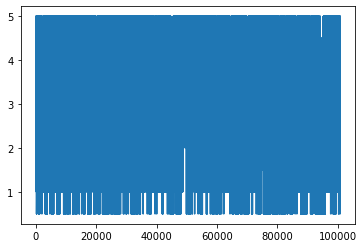

In [14]:
# Explorar as notas de maneira visual
notas.nota.plot()

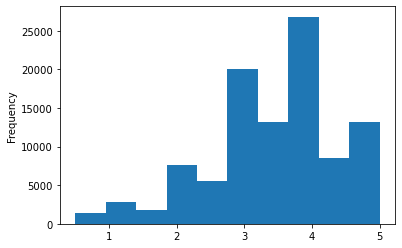

In [15]:
# Contar uma história de como os valores de nota estão distribuídos
notas.nota.plot(kind='hist')

In [16]:
# Descrevendo diversas medidas de descrição com o método describe()
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\lui-m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


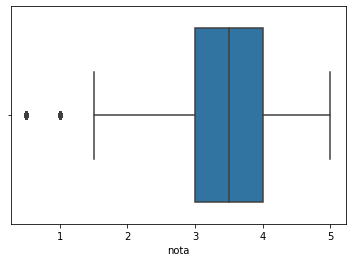

In [17]:
sns.boxplot(notas.nota)


O que aprendemos neste notebook:

1. Importar pandas que é uma biblioteca de análise de dados;
2. Ler dados CSV;
3. Fazer upload de arquivo para o Google Colab;
4. Renomear colunas;
5. Contar dados;
6. Melhorar a visualização das informações.



## Analisando notas específicas por filmes
### Aula 02 - Análise Exploratória

In [28]:
filmes = pd.read_csv("dados\movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head(10)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [24]:
# Aqui está a primeira query com o Id do filme igual a 1, trazendo a média das notas na coluna nota
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [27]:
# Agrupando o filme por Id com groupby e checando suas médias de notas
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head(10)

filmeId
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: nota, dtype: float64

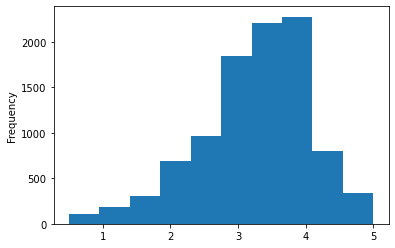

In [29]:
# Como se distribuem as médis dos filmes?
medias_por_filme.plot(kind='hist')

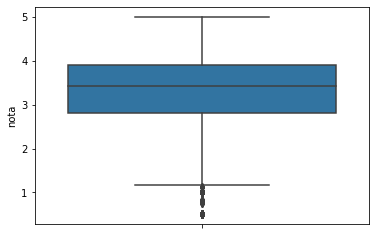

In [30]:
sns.boxplot(y=medias_por_filme)
# Esse boxplot pode ser plotado em eixos diferentes, sendo y no parametro que define

In [31]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\lui-m\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


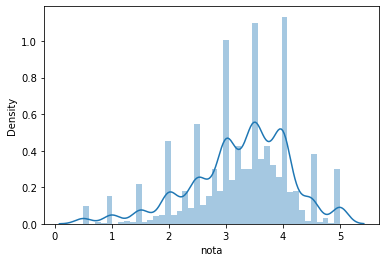

In [32]:
sns.distplot(medias_por_filme)

<Figure size 360x576 with 0 Axes>

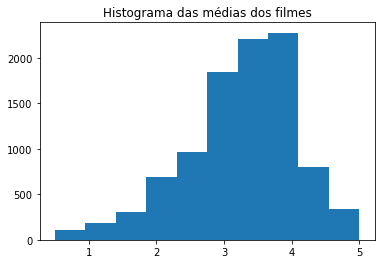

<Figure size 360x576 with 0 Axes>

In [33]:
# A matplotlib é uma biblioteca baixo nível em que se baseiam outras bibliotecas
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")
plt.figure(figsize=(5,8))
# Pandas e Seaborn também utilizam

In [34]:
notas.groupby("filmeId").mean() 
# Dessa forma o groupby tira a média de todas as colunas pelo filmeId

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [36]:
 # Já desta forma o groupby tira a média e mostra somente o que interessa, a nota
notas.groupby("filmeId").mean().nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

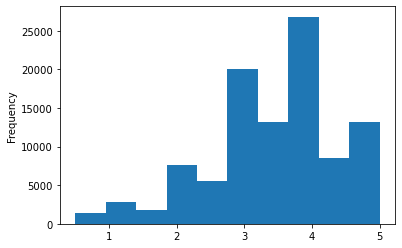

In [37]:
# Descrevendo os dados de nota
notas.nota.plot(kind='hist')
notas.nota.describe()

C:\Users\lui-m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


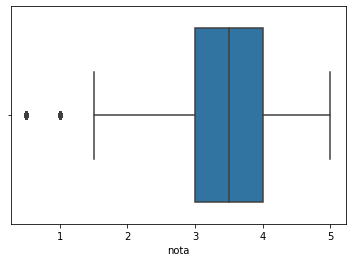

In [38]:
# Criando um boxplot de notas
sns.boxplot(notas.nota)

In [43]:
# Como podemos obter a média de cada um dos filmesId sem ter que digitar o comando milhares de vezes?
notas.groupby('filmeId').mean().nota
# Aqui pegamos a coluna da nota e alinhamos os filmes em ordem numérica, tiramos as médias e selecionamos a coluna notas, 
# para que o Pandas não tire a média de todas as colunas, só da que selecionamos.

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64


### O que aprendemos?
1. Trabalhar com query;
2. O que são bins;
3. Filtrar apenas uma coluna.


## Analisando TMDB movies
### Aula 03 - Variáveis

In [46]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [47]:
# Tipo de dado -> Língua
# É um tipo de variável CATEGÓRICA (nessa específica é uma categórica nominal)
tmdb.original_language.unique() # Dois jeitos - este é o primeiro

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [48]:
tmdb['original_language'].unique() # Este é o segundo

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# budget => orçamento => quantitativa
# quantidade de votos -> 1,2,3,4, não tem 2.5 votos

### Variáveis categóricas nominais e ordinais
#### O que aprendemos
1. Importar um CSV;
2. Identificar o tipo de uma variável observando seu conteúdo;
3. O que é categórica ordinal;
4. O que é quantitativa.
'''

1. Variáveis Quantitativas: são características que podem ser medidas em uma escala quantitativa, ou seja, aprensentam valores numéricos que fazem sentido. Podem ser contínuas ou discretas.

    1.1 Variáveis Discretas: características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores. Por exemplo: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.
    1.2 Variáveis contínuas: características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido. Exemplos: peso, altura, tempo, idade, pressão arterial.
    
2. Variáveis Qualitativas (ou categóricas): são as características que não possuem valores quantitativas, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos.
    2.1 Variáveis nominais: não existe ordenação dentre as categorias. Exemplos: Sexo, cor dos olhos, fumante/não fumante, doente/sadio.
    2.2 Variáveis Ordinais: existe uma ordenação entre as categorias. Exemplos: escolaridade, estágio da doença, mês de obervação.

## Aula 04 - Data Visualization

In [49]:
tmdb["original_language"].value_counts() # Serie, sequência de dados

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ar       2
ta       2
ro       2
id       2
cs       2
el       1
is       1
hu       1
vi       1
pl       1
tr       1
sl       1
ps       1
nb       1
xx       1
af       1
no       1
ky       1
te       1
Name: original_language, dtype: int64

In [50]:
# Posso transformar esse Series em um DataFrame:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


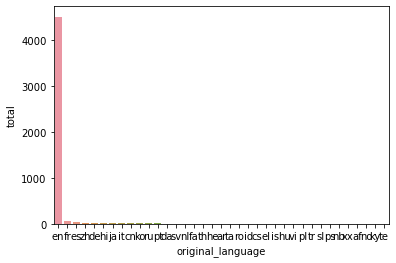

In [51]:
# Categorical plot no Seaborn, vamos utilizar o gráfico de barra
sns.barplot(x="original_language", y= "total",data = contagem_de_lingua)

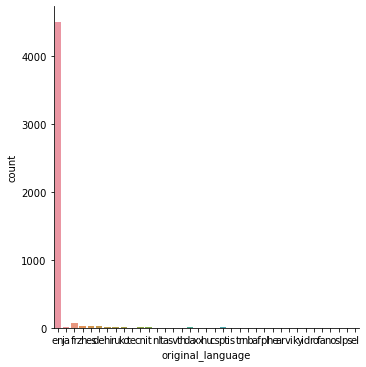

In [52]:
# Plotando gráficos de forma mais alto nível:
sns.catplot(x = 'original_language', kind = "count", data = tmdb)

In [ ]:
print(sns.__version__)

([<matplotlib.patches.Wedge at 0x1bb2965c7c0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

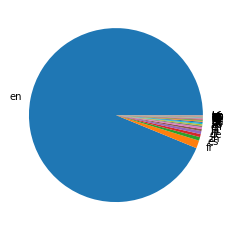

In [53]:
# Gráfico de Pizza (quase) sempre uma má ideia
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [55]:
# Total dos filmes por inglês e pelo resto das línguas
total_por_lingua = tmdb["original_language"].value_counts()
total_por_ingles = total_por_lingua['en']
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_por_ingles
print(total_por_ingles, total_do_resto)

4505 298


In [56]:
# Criando aqui um dicionário com os dados das línguas dos filmes
dados = {
    'lingua' : ['ingles', 'outros'],
    'total'  : [total_por_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [57]:
# Tornando o dicionário anterior em um dataframe
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


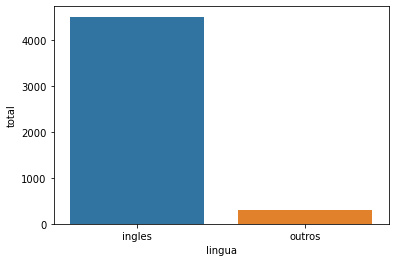

In [58]:
sns.barplot(x='lingua', y='total', data=dados)

([<matplotlib.patches.Wedge at 0x1bb297a8df0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

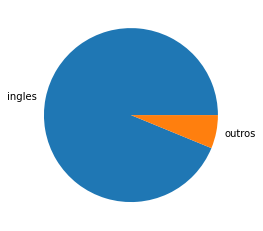

In [59]:
# Ficou muito melhor, porém ainda muito feio kkkkk
plt.pie(dados['total'], labels = dados['lingua'])

In [60]:
# Posso fazer uma query retornando somente os filmes em inglês:
tmdb.query("original_language  == 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

In [61]:
# Assim como também posso trazer por query somente os filmes que não em inglês
total_filmes_nao_ingles = tmdb.query("original_language != 'en'")

In [62]:
# Agora desses filmes eu faço a contagem com o value_counts
total_outros = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_outros

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
id     2
ar     2
ro     2
ta     2
cs     2
af     1
is     1
te     1
xx     1
ky     1
pl     1
no     1
nb     1
vi     1
hu     1
el     1
sl     1
tr     1
ps     1
Name: original_language, dtype: int64

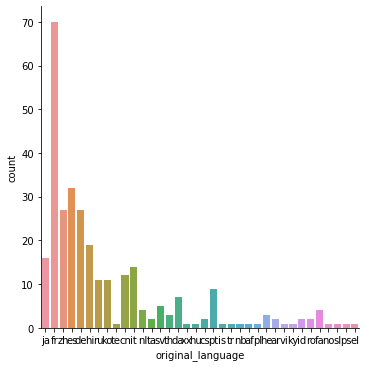

In [63]:
sns.catplot(x = 'original_language', kind="count", data = total_filmes_nao_ingles)

### O que aprendemos?
1. Comparar categorias;
2. O que é uma Series;
3. Instalar o seaborn;
4. Transformar em dataframe com a função to_frame();
5. Remover o índice para gerar duas colunas usando a função reset_index();
6. Utilizar o Categorical do seaborn.

## Aula 05 - Data Visualization - Continuação

<Figure size 360x720 with 0 Axes>

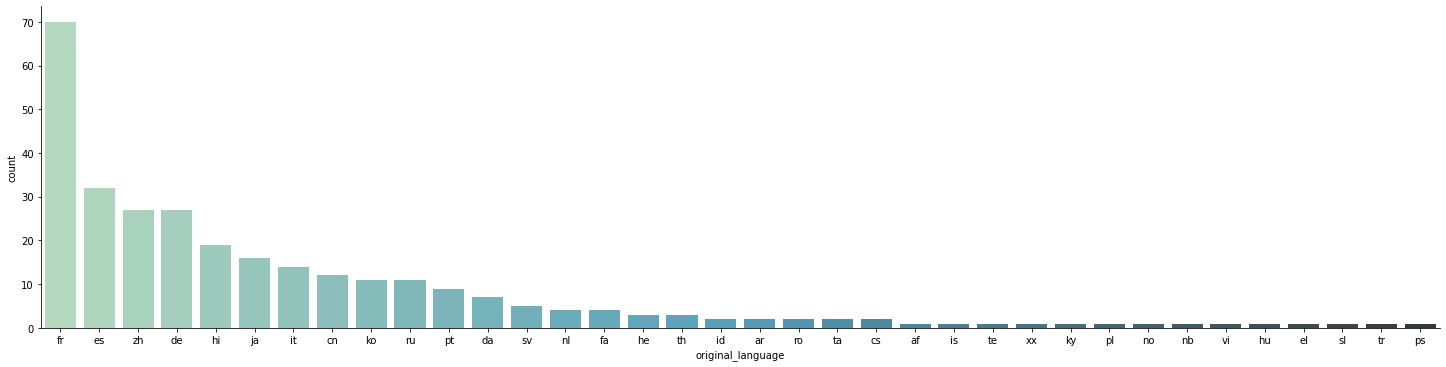

In [66]:
# Agora vamos lapidar este gráfico
plt.figure(figsize=(5,10))
sns.catplot(x = 'original_language', kind="count", 
                data = total_filmes_nao_ingles, aspect = 4, 
                order = total_outros.index,
                palette ="GnBu_d" )
# Compare com o gráfico acima

Reescalar o gráfico;
Ordenar o gráfico;
Alterar os tons do gráfico.

In [112]:
# Qual é o filme que tem o maior desvio padrão, ou seja, o que divide mais opiniões?
polemico = notas.groupby("filmeId").std()
polemico
polemico.sort_values('nota', ascending = False)


,usuarioId,nota,momento
filmeId,,,
2068,85.559921,3.181981,1.071043e+08
32892,326.683333,3.181981,5.563466e+07
7564,236.173665,2.828427,3.250676e+05
84847,5.656854,2.828427,3.955957e+07
484,248.901587,2.828427,5.296211e+06
...,...,...,...
193581,NaN,NaN,NaN
193583,NaN,NaN,NaN
193585,NaN,NaN,NaN


## Aula 06 - Dados e Estatística

In [67]:
# Eu não sabia que você podia colocar um valor no head para retornar o número selecionado de linhas
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [68]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [69]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [70]:
print("Nota Média do Toy Story: %.2f" % notas_do_toy_story['nota'].mean())
print("Nota Média do Jumanji: %.2f" % notas_do_jumanji['nota'].mean())

Nota Média do Toy Story: 3.92
Nota Média do Jumanji: 3.43


In [ ]:
# Usando agora a mediana para obter mais informações das notas dos dois filmes
print("Mediana do Toy Story: %.2f" % notas_do_toy_story['nota'].median())
print("Mediana do Jumanji: %.2f" % notas_do_jumanji['nota'].median())

In [ ]:
import numpy as np

np.array([2.5] * 10)
np.array([3.5] * 10)

filme1 = np.append(np.array([2.5] * 10),np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean())
print(filme2.mean())

In [ ]:
# Plotando gráficos e tipos de visualizações diferentes para angrariar mais informações sobre as notas
sns.boxplot(notas_do_toy_story['nota'])

In [ ]:
# Podemos ver que as notas do Toy Story se deslocam mais acima das notas de Jumanji
plt.boxplot([notas_do_toy_story['nota'], notas_do_jumanji['nota']])

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))

In [ ]:
# Uma medidade importante é o DESVIO PADRÃO -> desviando por padrão
notas_do_jumanji['nota'].std()

### Revisando o papel da média, mediana, medidas de tendência geral, dispersão, desvio padrão, box plot, histograma

## Revisando Aula 06:
Comparar a média de filmes;
Juntar arrays com o np.append();
O que é a dispersão de dados;
Desvio padrão.